# In Class Notebook, Week 03

You can access this notebook in near-realy time by going here:

https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week03/inClass_week03.ipynb 

Or by pasting that URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv'
buildings = pd.read_csv(data_url)

In [3]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [4]:
buildings.index # number of rows in this dataset is 8863

RangeIndex(start=0, stop=8862, step=1)

In [6]:
buildings.iloc[10:13] # very much like slicing a list

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
10,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
11,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
12,Department of Natural Resources,Eldon Hazlet State Park - Clinton County,Keyesport Road,Carlyle,62231,Clinton,15,John Shimkus,107,Cavaletto John,...,In Use,1999,1999,96,1,1,0,Storage,Storage,Not provided


In [7]:
buildings.iloc[10:13]["Agency Name"] # the "Agency Name" column of the 10-13 rows

10    Department of Natural Resources
11    Department of Natural Resources
12    Department of Natural Resources
Name: Agency Name, dtype: object

In [8]:
buildings["Agency Name"].nunique() # counts unique values of a column

35

In [9]:
buildings["Agency Name"].unique()

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Human Services', 'Department of Transportation',
       'Department of State Police', 'Department of Military Affairs',
       'Department of Agriculture', 'Governors State University',
       'Department of Central Management Services',
       'Illinois State University', 'Historic Preservation Agency',
       'Department of Juvenile Justice', 'Southern Illinois University',
       'Illinois Medical District Commission', 'University of Illinois',
       "Department of Veterans' Affairs", 'Chicago State University',
       'Northern Illinois University', 'Office of the Secretary of State',
       'Illinois Emergency Management Agency',
       'Western Illinois University', 'Eastern Illinois University',
       'Northeastern Illinois University',
       'Illinois Community College Board',
       'Illinois Board of Higher Education',
       'IL State Board of Education', 'Department of Revenue',


In [10]:
buildings["Bldg Status"].unique()

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

In [11]:
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [12]:
buildings.loc[buildings["Square Footage"]==0] # .loc NOT .iloc and using boolean expression

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
74,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Assembly,Assembly,Not provided
76,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Business,Business,Not provided
181,Department of Corrections,Vandalia Correctional Center - Fayette County,"P.o. Box 500, Rte. 51 N.",Vandalia,62471,Fayette,15,John Shimkus,107,Cavaletto John,...,In Use,2001,2001,0,1,1,0,Industrial,Industrial,Not provided
333,Department of Transportation,Gurnee - Lake County,3516 West Washington Street,Gurnee,60031,Lake,18,Darin M. LaHood,99,Wojcicki Jimene Sara,...,In Use,2001,2001,0,1,1,0,Storage,Storage,Not provided
421,Northern Illinois University,Northern Illinois University - DeKalb,Northern Illinois University,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1999,1999,0,2,1,1,Education,Education,Not provided
422,Northern Illinois University,Northern Illinois University - DeKalb,1805 West Lincoln Hwy,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1997,1920,0,4,3,1,Storage,Storage,Not provided
507,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,2001,2001,0,1,1,0,Residential,Residential,Not provided
540,Department of Agriculture,DuQuoin State Fairgrounds - Perry County,"Route #2, Box 306",Duquoin,62832,Perry,12,Mike Bost,115,Bryant Terri,...,In Use,1988,1988,0,1,1,0,Storage,Storage,Not provided
551,Department of Natural Resources,Nauvoo State Park - Hancock County,So Sidney,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Storage,Storage,Not provided
552,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Residential,Residential,Not provided


In [13]:
# all of the rows that are "in progress" of being built
buildings.loc[buildings["Bldg Status"]=='In Progress']

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
772,Department of Veterans' Affairs,Quincy Veterans' Home - Adams County,1707 North 12th Street,Quincy,62301,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2010,2010,5200,1,1,0,Storage,Storage,Not provided
792,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,30000,2,2,0,Education,Education,Not provided
796,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
797,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
798,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018,2018,1455,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017,2017,6720,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN


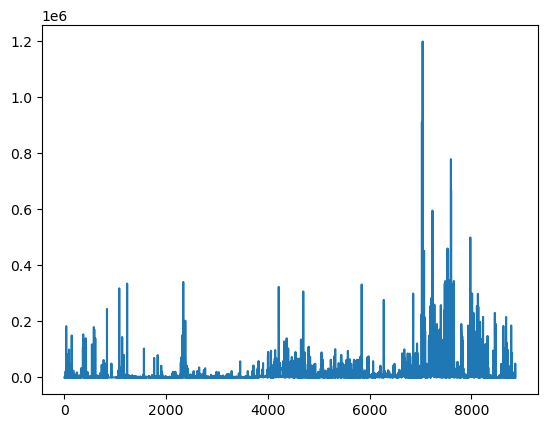

In [15]:
buildings["Square Footage"].plot()
plt.show() # we know now that the backend is matplotlib!

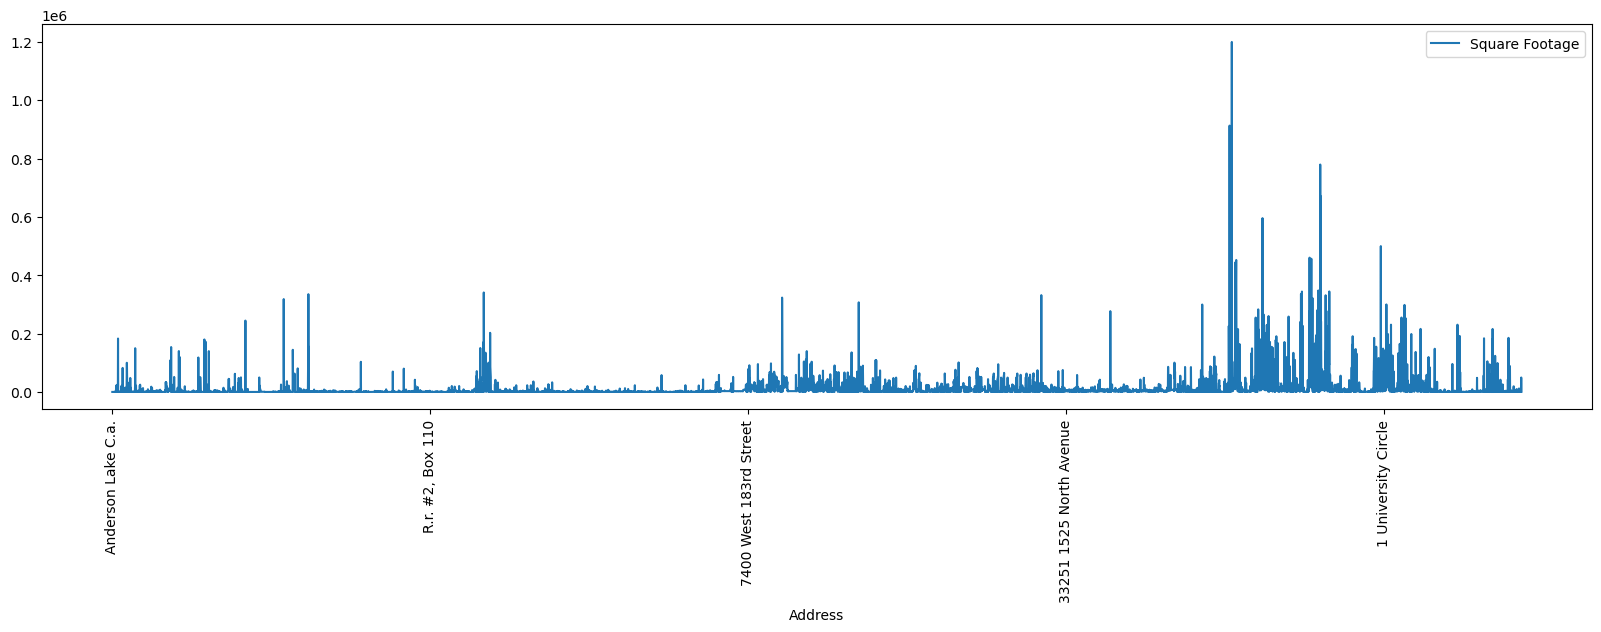

In [18]:
buildings.plot(x='Address', y='Square Footage', figsize=(20,5), rot=90)
plt.show()

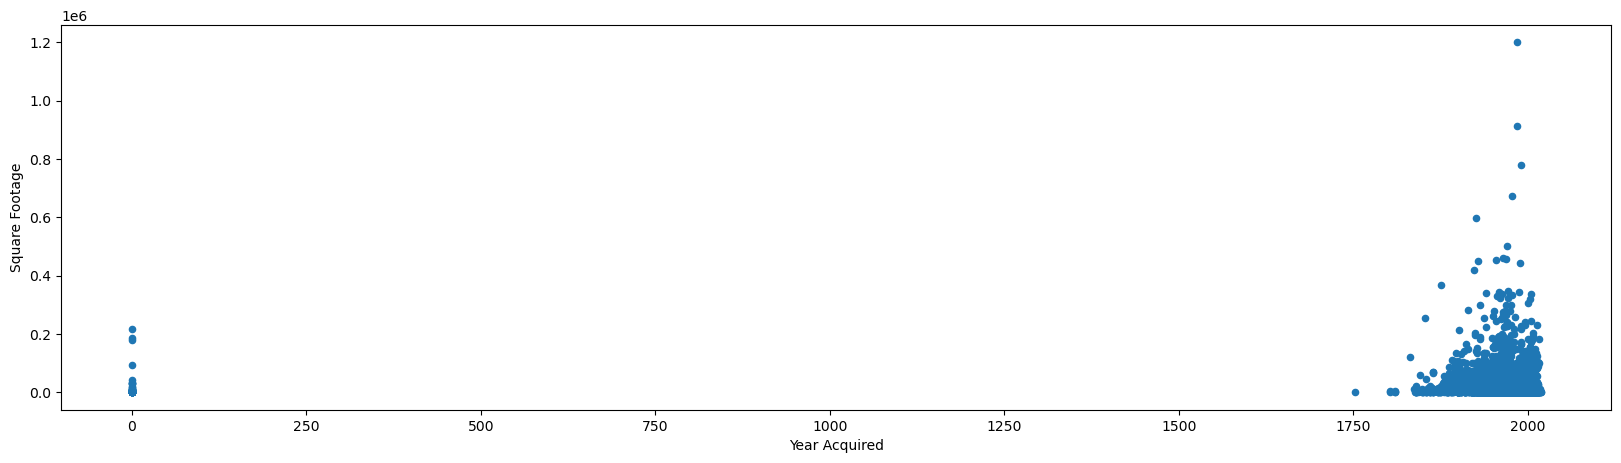

In [21]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
plt.show()

In [22]:
buildings.plot?

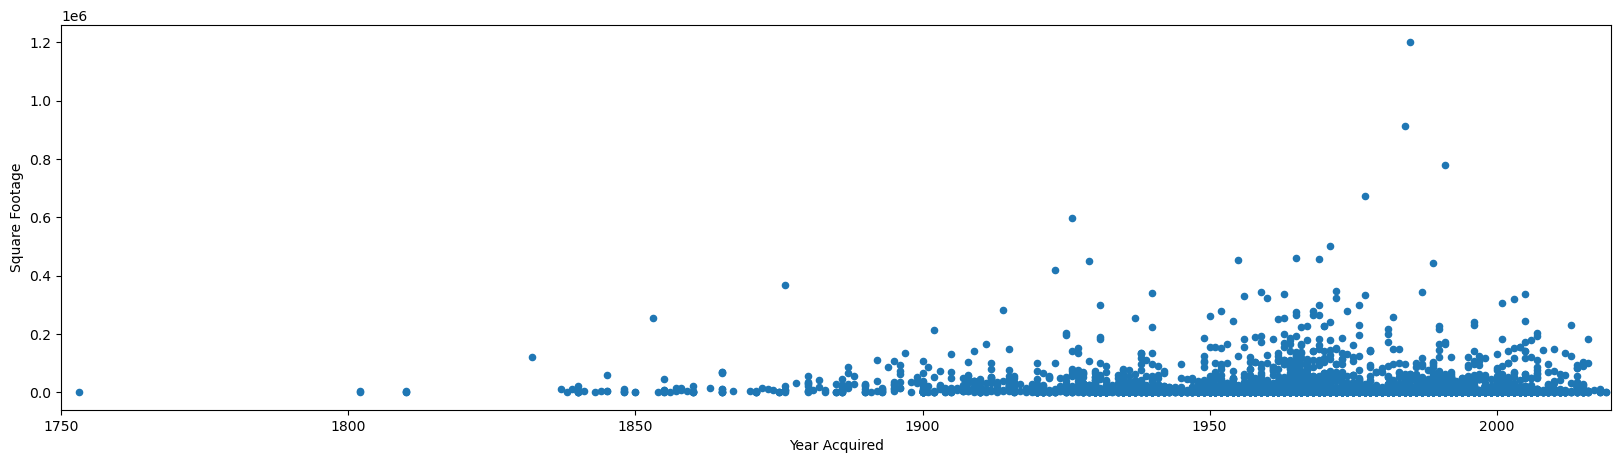

In [25]:
ax = buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
ax.set_xlim(1750,2020)
plt.show()

In [26]:
buildings.groupby("Bldg Status")

In [28]:
buildings["Bldg Status"].unique()

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

In [27]:
for group in buildings.groupby("Bldg Status"):
    print(group)

('Abandon',                                     Agency Name  \
381                Department of Human Services   
449             Department of Natural Resources   
1050            Department of Natural Resources   
1139  Department of Central Management Services   
1172            Department of Natural Resources   
...                                         ...   
8682             Department of Military Affairs   
8683             Department of Military Affairs   
8760               Historic Preservation Agency   
8800             Department of Military Affairs   
8801             Department of Military Affairs   

                                         Location Name  \
381        Lincoln Developmental Center - Logan County   
449       Clinton Lake Recreation Area - DeWitt County   
1050           Jim Edgar Panther Creek F&WA - Cass Co.   
1139                                 Statewide Program   
1172   Saline County Conservation Area - Saline County   
...                        

In [29]:
#for group in buildings.groupby("Bldg Status"):
for status, df in buildings.groupby("Bldg Status"):
    print(status, df.shape)

Abandon (226, 22)
In Progress (113, 22)
In Use (8523, 22)


In [30]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,1500,1,0,0,Storage,NaN,NaN
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN


In [31]:
buildings["Square Footage"].max()

1200000

In [32]:
buildings["Square Footage"].min()

0

In [34]:
pd.read_csv?

In [36]:
buildings = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv",
                       na_values = {"Square Footage":0,
                                    "Year Acquired":0,
                                    "Year Constructed":0})

In [37]:
buildings['Square Footage'].min()

9.0

In [40]:
b2 = buildings.sort_values("Year Constructed")

In [41]:
b2.iloc[0]

Agency Name                                     Historic Preservation Agency
Location Name              Fort De Chartres Historic Site - Prairie Du Ro...
Address                                                   1350 State Hwy 155
City                                                       Prairie Du Rocher
Zip code                                                               62241
County                                                              Randolph
Congress Dist                                                             12
Congressional Full Name                                            Mike Bost
Rep Dist                                                                 116
Rep Full Name                                             Costello, II Jerry
Senate Dist                                                               58
Senator Full Name                                               Paul Schimpf
Bldg Status                                                           In Use

In [48]:
# want to know the amount of square footage acquired per year
agg = buildings.groupby("Year Acquired")["Square Footage"].sum()
agg # stands for aggregated data

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

In [45]:
type(b3)

pandas.core.series.Series

In [47]:
type(buildings)

pandas.core.frame.DataFrame

In [49]:
agg.index

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

In [50]:
agg.values

array([1.200000e+03, 4.440000e+03, 4.033000e+03, 1.200000e+05,
       1.030200e+04, 2.010000e+03, 1.175200e+04, 3.691800e+04,
       3.256000e+03, 9.000000e+02, 4.088000e+03, 6.584600e+04,
       2.129200e+04, 2.267000e+03, 2.550000e+05, 2.140000e+03,
       6.615400e+04, 7.500000e+02, 1.812400e+04, 2.236700e+04,
       4.847000e+03, 2.741700e+04, 1.579500e+04, 2.234940e+05,
       2.700000e+03, 2.864000e+03, 6.403000e+03, 1.490000e+04,
       1.100000e+04, 6.600000e+03, 3.808000e+03, 4.042800e+05,
       3.307100e+04, 1.798330e+05, 6.671000e+03, 5.926600e+04,
       8.725000e+03, 3.015700e+04, 1.683700e+05, 1.948230e+05,
       8.492400e+04, 8.633400e+04, 2.325000e+03, 1.514800e+05,
       3.959000e+04, 8.500000e+04, 2.256770e+05, 2.901650e+05,
       1.329070e+05, 3.676000e+04, 1.214750e+05, 3.358350e+05,
       1.094860e+05, 2.697250e+05, 1.605840e+05, 4.096400e+04,
       3.128860e+05, 2.037400e+04, 1.332850e+05, 3.602520e+05,
       2.982830e+05, 2.314110e+05, 2.377220e+05, 4.2281

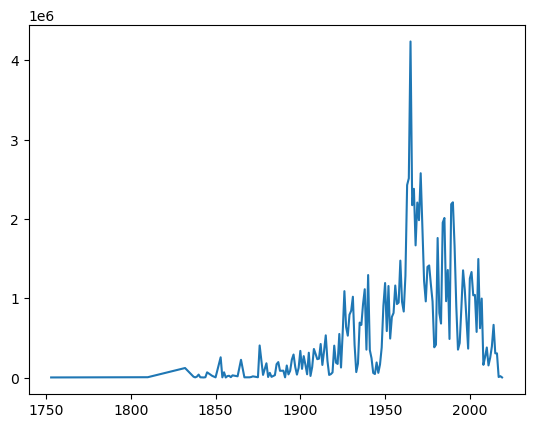

In [51]:
plt.plot(agg.index, agg.values)

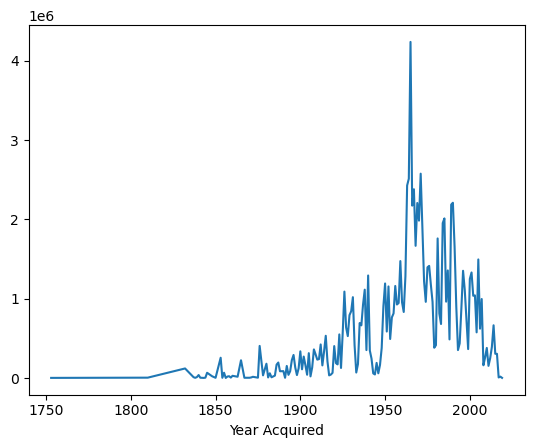

In [52]:
agg.plot()

In [53]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [54]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


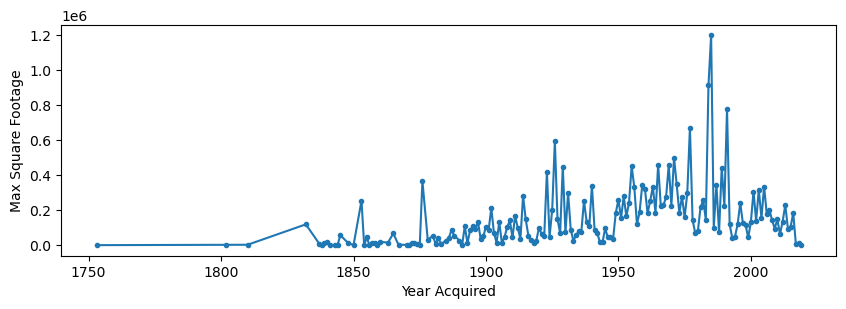

In [56]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.') # plotting the 'max' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
plt.show()

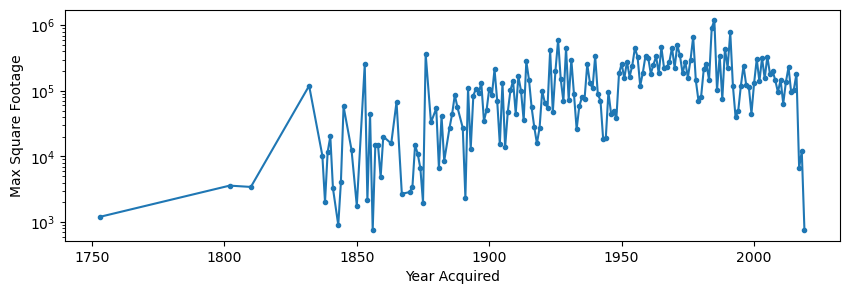

In [57]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.') # plotting the 'max' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
ax.set_yscale('log')
plt.show()

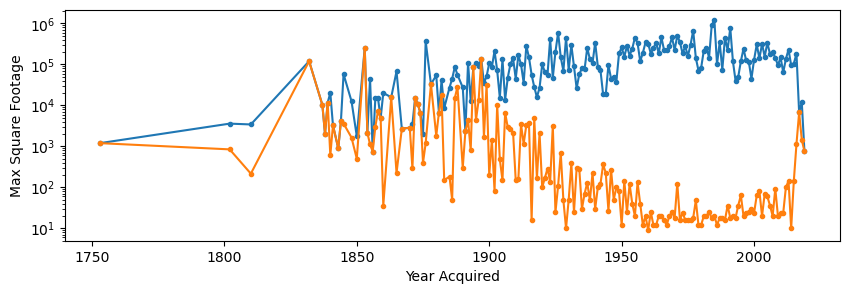

In [58]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.') # plotting the 'max' column of stats
ax.plot(stats['min'],marker='.') # plotting the 'min' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
ax.set_yscale('log')
plt.show()

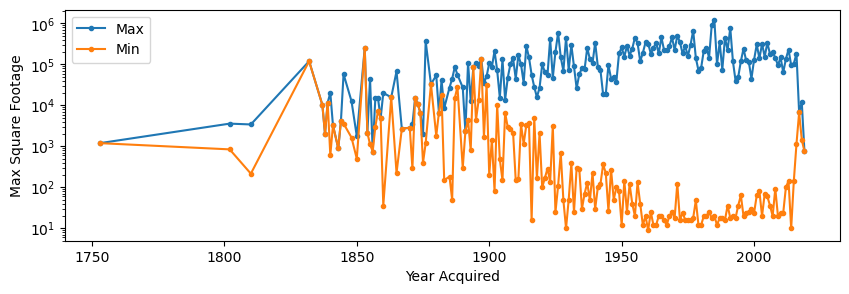

In [59]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
ax.set_yscale('log')
ax.legend() # placing the labels in a legend that i added to the plots
plt.show()

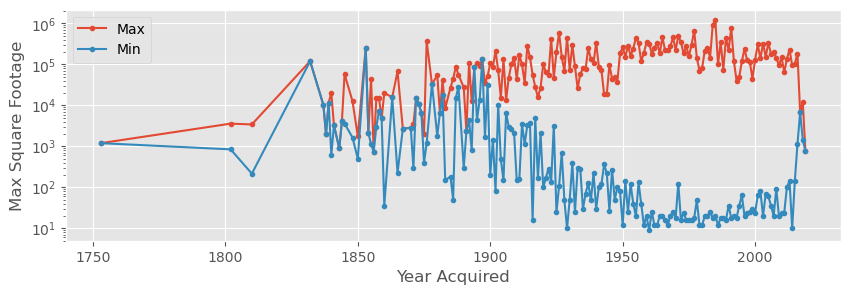

In [61]:
with plt.style.context("ggplot"):
    # COMMAND + ]
    fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
    ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
    ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
    ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
    ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
    ax.set_yscale('log')
    ax.legend() # placing the labels in a legend that i added to the plots
plt.show()

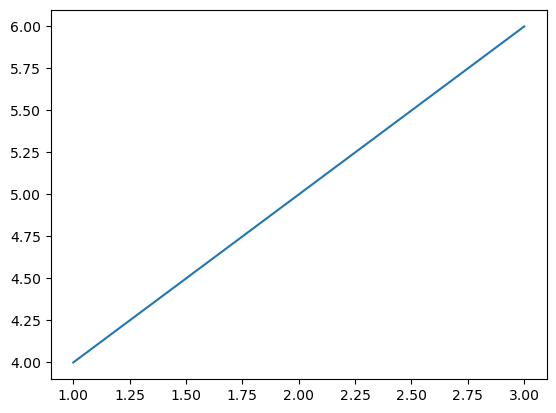

In [62]:
plt.plot([1,2,3],[4,5,6])

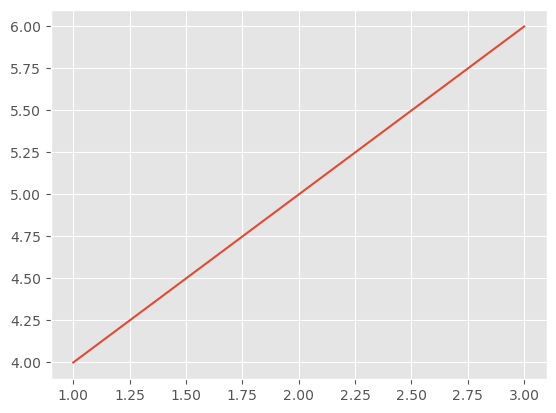

In [63]:
plt.style.use('ggplot')
plt.plot([1,2,3],[4,5,6])

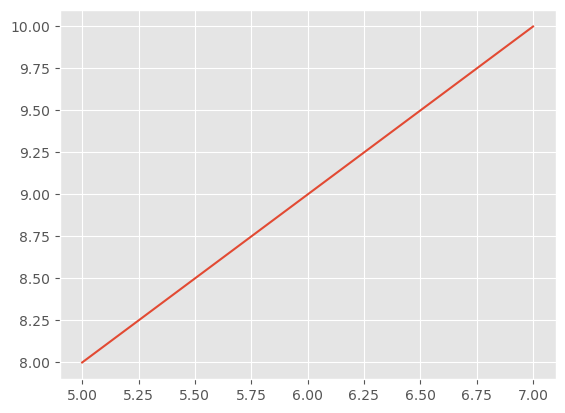

In [64]:
plt.plot([5,6,7], [8,9,10])

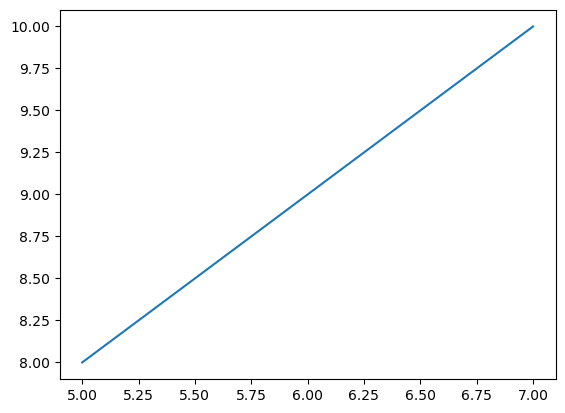

In [65]:
plt.style.use('default')
plt.plot([5,6,7], [8,9,10])

In [66]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [67]:
def make_plot(style):
    with plt.style.context(style):
        # COMMAND + ]
        fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
        ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
        ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
        ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
        ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
        ax.set_yscale('log')
        ax.legend() # placing the labels in a legend that i added to the plots
    plt.show()

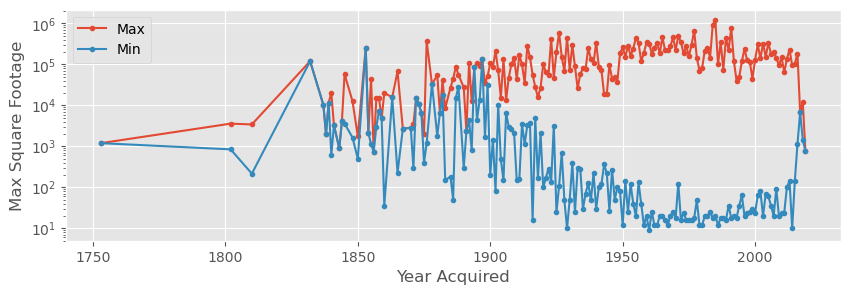

In [68]:
make_plot('ggplot')

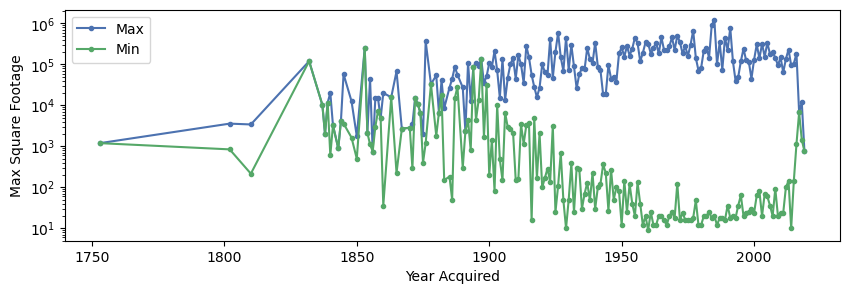

In [69]:
make_plot('seaborn-deep')

In [71]:
import ipywidgets

In [73]:
@ipywidgets.interact(style=plt.style.available) # decorator, @
def make_plot(style): # our function is being decorated!
    with plt.style.context(style):
        # COMMAND + ]
        fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
        ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
        ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
        ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
        ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
        ax.set_yscale('log')
        ax.legend() # placing the labels in a legend that i added to the plots
    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

## Playing around with colormaps in matplotlib

In [74]:
import matplotlib.cm as cm

In [75]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

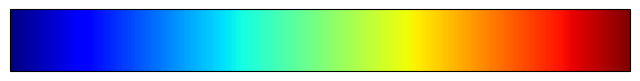

In [81]:
# 1. make a plot and hard-code an option for a color map

colormap_name = 'jet' # "bad" rainbow colormap! <-- have hard coded this option

fig, ax = plt.subplots(figsize=(8,0.8)) # long + skinny canvas
color_map = plt.get_cmap(colormap_name) # grabbed the color map
# plotting the colorbar without any data
matplotlib.colorbar.ColorbarBase(ax,cmap=color_map,orientation='horizontal')
ax.xaxis.set_visible(False) # take off all of the axis
plt.show()

In [82]:
# 2. make a function with the hard coded input as a parameter

def make_colorbar(colormap_name):
    fig, ax = plt.subplots(figsize=(8,0.8)) # long + skinny canvas
    color_map = plt.get_cmap(colormap_name) # grabbed the color map
    # plotting the colorbar without any data
    matplotlib.colorbar.ColorbarBase(ax,cmap=color_map,orientation='horizontal')
    ax.xaxis.set_visible(False) # take off all of the axis
    plt.show()

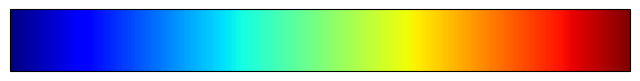

In [83]:
# 2.5 test out function
make_colorbar("jet")

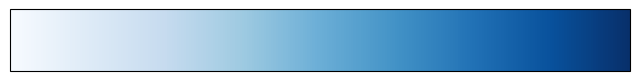

In [84]:
make_colorbar("Blues")

In [85]:
# 3. use ipywidgets decorator to make our function interactive
@ipywidgets.interact(colormap_name=plt.colormaps())
def make_colorbar(colormap_name):
    fig, ax = plt.subplots(figsize=(8,0.8)) # long + skinny canvas
    color_map = plt.get_cmap(colormap_name) # grabbed the color map
    # plotting the colorbar without any data
    matplotlib.colorbar.ColorbarBase(ax,cmap=color_map,orientation='horizontal')
    ax.xaxis.set_visible(False) # take off all of the axis
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

## Applying colormaps (interactively!) to data

In [86]:
michigan_file = '/Users/jnaiman/Downloads/michigan_lld.flt'

In [88]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape((5365,4201))
# somewhere in the metadata of this https://www.ngdc.noaa.gov/mgg/greatlakes/michigan.html
# in the binary float format is this shape information

In [89]:
michigan.shape

(5365, 4201)

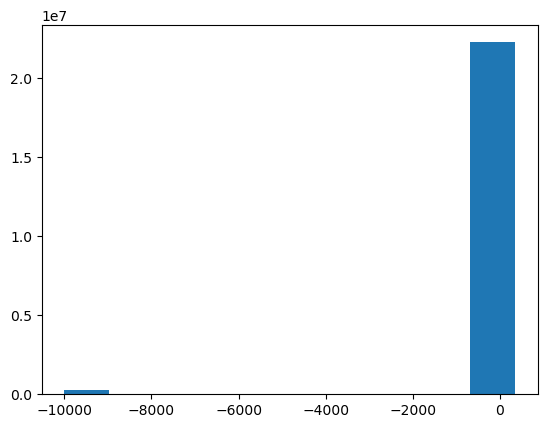

In [90]:
plt.hist(michigan.flatten())
plt.show()

In [91]:
np.min(michigan)

-9999.0

In [92]:
michigan[michigan==-9999] = np.nan

In [93]:
np.min(michigan)

nan

In [95]:
np.nanmin(michigan)

-275.89

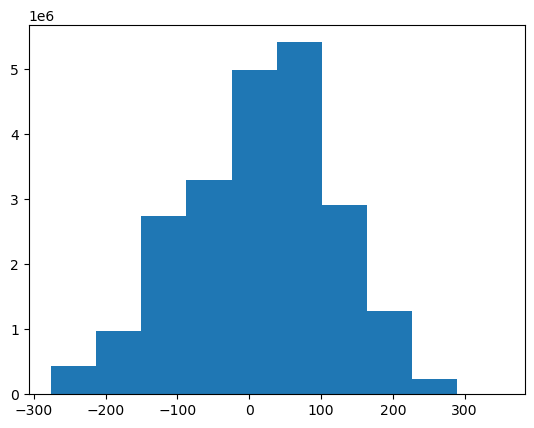

In [96]:
plt.hist(michigan.flatten())
plt.show()

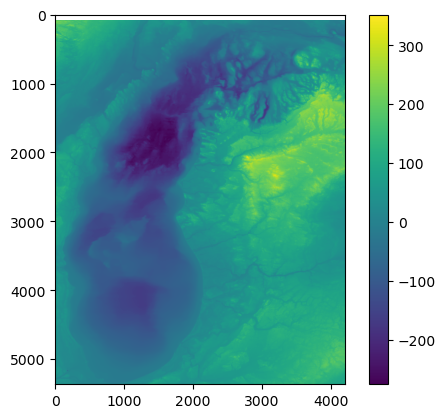

In [97]:
plt.imshow(michigan) # treating our 2d dataset like an image
plt.colorbar() # adding a colorbar
plt.show()

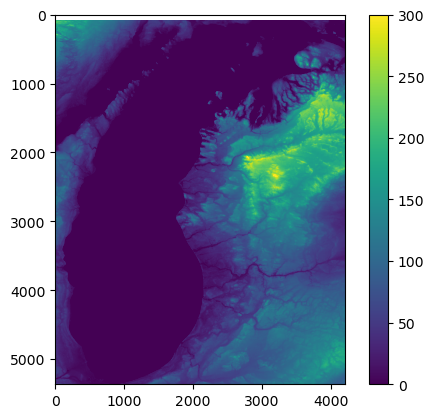

In [98]:
plt.imshow(michigan) # treating our 2d dataset like an image
plt.colorbar() # adding a colorbar
plt.clim(0,300) # only the "above water level data"
plt.show()

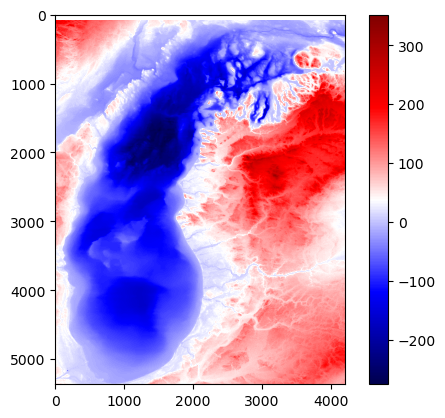

In [99]:
plt.imshow(michigan, cmap='seismic') # seismic is divergent colormap
plt.colorbar()
plt.show()

So this is bad for a VARIETY of reasons. (1) its a bit hard to look at, (2) it is a divergent colormap, but not centered around the "interesting" center value of 0

In [100]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

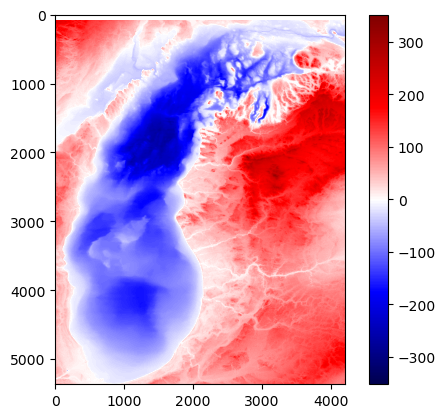

In [101]:
plt.imshow(michigan,cmap='seismic')
plt.colorbar()
plt.clim(-352,352)
plt.show()

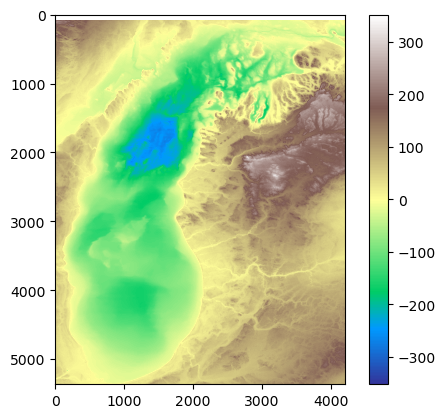

In [102]:
plt.imshow(michigan, cmap='terrain')
plt.colorbar()
plt.clim(-352,352)
plt.show()

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


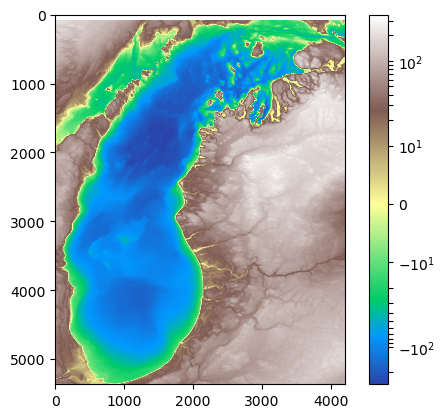

In [103]:
plt.imshow(michigan, cmap='terrain',norm=matplotlib.colors.SymLogNorm(10))
plt.colorbar()
plt.clim(-352,352)
plt.show()

In [104]:
matplotlib.colors.SymLogNorm?

In [105]:
1,10,50

(1, 10, 50)

In [106]:
np.log10([1,10,50])

array([0.     , 1.     , 1.69897])

In [107]:
np.log10([-1,-10,-50])

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([nan, nan, nan])

In [108]:
np.log10(np.abs([-1,-10,-50]))

array([0.     , 1.     , 1.69897])

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """


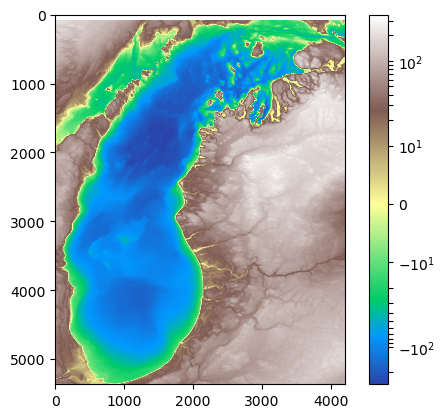

In [109]:
# 1. hardcode some options

colormap = 'terrain'

plt.imshow(michigan, cmap=colormap,norm=matplotlib.colors.SymLogNorm(10))
plt.colorbar()
plt.clim(-352,352)
plt.show()

In [110]:
# 2. build a function with the hard-coded part as a parameter
def make_michigan_plot(colormap):
    plt.imshow(michigan, cmap=colormap,norm=matplotlib.colors.SymLogNorm(10))
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  This is separate from the ipykernel package so we can avoid doing imports until


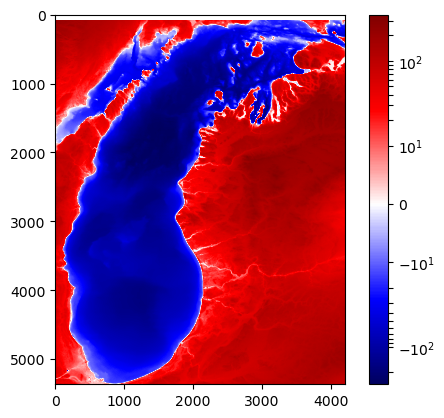

In [111]:
# 2.5 test!
make_michigan_plot('seismic')

In [112]:
@ipywidgets.interact(colormap=plt.colormaps())
def make_michigan_plot(colormap):
    plt.imshow(michigan, cmap=colormap,norm=matplotlib.colors.SymLogNorm(10))
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrB…

In [113]:
#2. Part 2!
def make_michigan_plot(colormap, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan, cmap=colormap,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

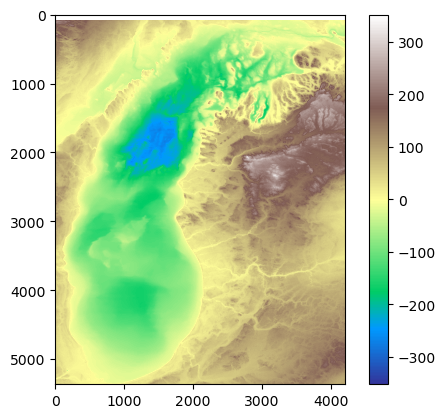

In [114]:
make_michigan_plot('terrain',take_log=False)

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  after removing the cwd from sys.path.


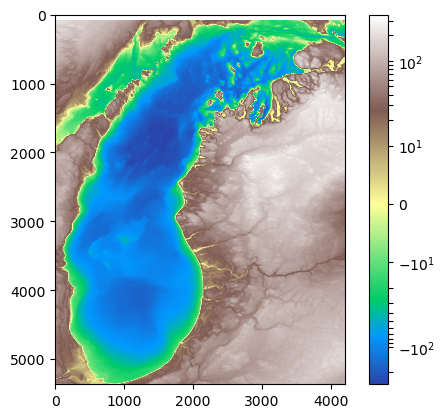

In [115]:
make_michigan_plot('terrain',take_log=True)

In [116]:
@ipywidgets.interact(colormap=plt.colormaps(), take_log=True)
def make_michigan_plot(colormap, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan, cmap=colormap,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrB…

## quick look at homework

In [117]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/licenses_fall2022.csv'
licenses = pd.read_csv(data_url)

In [118]:
licenses

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,888281,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129002843.0,NOT RENEWED,N,NaN,JENNIFER,NaN,DARROW,...,None,None,None,N,08/03/2006,None,None,None,None,None
9996,766623,DETECTIVE BOARD,FIREARM CONTROL CARD,229014180,TERMINATED CARD RETURNED,N,NaN,BRYAN,NaN,WILLIAMS,...,None,None,None,N,08/07/2006,None,None,None,None,None
9997,399398,COSMO,LICENSED COSMETOLOGIST,11120249,NOT RENEWED,N,NaN,EUGENE,NaN,HENDERSON JR,...,None,None,None,N,05/26/2006,None,None,None,None,None
9998,486713,COSMO,LICENSED COSMETOLOGIST,11193270,ACTIVE,N,NaN,MAHLON DOUGLAS,NaN,CLIFT,...,None,None,None,N,12/17/2021,None,None,None,None,None


In [119]:
licenses.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason'],
      dtype='object')

In [121]:
licenses['Original Issue Date']

0       02/03/2020
1       02/07/1995
2       02/28/1945
3       11/22/2011
4       07/12/1995
           ...    
9995    08/04/1987
9996    05/22/1989
9997    05/09/1966
9998    10/04/1983
9999    10/16/2008
Name: Original Issue Date, Length: 10000, dtype: object

In [122]:
licenses['Original Issue Date'].unique()

array(['02/03/2020', '02/07/1995', '02/28/1945', ..., '12/07/1979',
       '04/04/2005', '09/27/1982'], dtype=object)

In [123]:
# the original issue date to a datetime object
licenses['Original Issue Date'] = pd.to_datetime(licenses['Original Issue Date'],
                                                 errors='coerce',format='%m/%d/%Y')


In [124]:
licenses['Original Issue Date']

0      2020-02-03
1      1995-02-07
2      1945-02-28
3      2011-11-22
4      1995-07-12
          ...    
9995   1987-08-04
9996   1989-05-22
9997   1966-05-09
9998   1983-10-04
9999   2008-10-16
Name: Original Issue Date, Length: 10000, dtype: datetime64[ns]

In [125]:
licenses['Original Issue Year'] = licenses['Original Issue Date'].dt.year # .day? .month?

In [126]:
licenses['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

In [127]:
licenses['Original Issue Year'].min()

1912.0

In [128]:
licenses['Original Issue Year'].max()

2022.0

In [129]:
licenses.loc[licenses['Original Issue Year']==np.nan]

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason,Original Issue Year


In [131]:
licenses['License Type'].unique()

array(['DETECTIVE BOARD', 'COSMO', 'FUNERAL AND EMBALMER', 'DENTAL',
       'DESIGN FIRM', 'LIMITED LIABILITY CO', 'ATHLETIC TRAINER',
       'DIETETIC AND NUTRITION', 'APPRAISAL', 'MASSAGE LICENSING BD',
       'ARCHITECT', 'ATHLETICS', 'MAR AND FAM THERAPIST', 'GEOLOGY',
       'HME AND SERVICES PROV', 'COLLECTION AGENCY',
       'ENVIRON. HLTH PRACT', 'HOME INSPECTOR', 'LAND SURVEYOR BOARD',
       'CLIN PSYCHOLOGIST', 'INTERIOR DESIGN', 'LANDSCAPE ARCHITECT',
       'COMM ASSOC MGR', 'IDPR', 'MEDICAL BOARD', 'DETECT. DECEPTION',
       'AUCTIONEER', 'CEMETERY OVERSIGHT'], dtype=object)